In [1]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

# Coin flipping problem

Here's a seemingly simple problem.  Flip a fair coin four times and record the results in order. For the recorded sequence, compute the proportion of the flips which immediately follow a H that result in H.  What value do you expect for this proportion? (If there are no trials which follow a H, i.e. the outcome is either TTTT or TTTH, discard the sequence and try again with four more flips.)


For example, the sequence HHTT means the the first and second flips are heads and the third and fourth flips are tails.  For this sequence there are two flips which immediately followed heads, the second and the third, of which one (the second) was heads.  So the proportion in question for this sequence is 1/2. 

To code the simulation, it helps to treat H as 1 and T as 0.  That way you can count H just by adding the values in the sequence.  For example, HHTT would be `(1, 1, 0, 0)` and the number of H would be 1+1+0+0=2.

We first define functions that count (1) the number of flips that follow H, and (2) the number of H among the flips that follow H.

In [2]:
# A "flip_sequence" is a list of 0s and 1s with 1 representing H and 0 T

# Define a function to count the flips that follow H
def count_flips_following_H(flips):
    return sum(flips[0:(len(flips) - 1)])

# Define a function that counts the H among 
def count_H_following_H(flips):
    return sum(a * b for a, b in zip(flips[1:len(flips)], flips[0:(len(flips) - 1)]))

In [3]:
# An example

flips = (1, 1, 0, 0)

count_flips_following_H(flips)

2

In [4]:
count_H_following_H(flips)

1

Now we define the simulation.  The *probability space* corresponds to four flips of a four coin.  We'll define the proportion of H in flips that follow H as a *random variable* $X$, where

$$
X = \frac{Y}{Z} = \frac{\text{number of flips that follow H that are H}}{\text{number of flips that follow H}}
$$

In [5]:
P = BoxModel([0, 1], size = 4)
Z = RV(P, count_flips_following_H)
Y = RV(P, count_H_following_H)
X = Y / Z

For the outcome $\omega = HHTT$, $X(\omega) = 1/2$

In [6]:
outcome = (1, 1, 0, 0)
X(outcome)

0.5

Now we run the simulation to simulate many values of $X$.  Note that we can only compute $X$ when $Z>0$.

In [7]:
x = (X | (Z > 0) ).sim(14000)
x

0,0.5
1,0.5
2,0.5
3,0.0
4,1.0
5,0.6666666666666666
6,0.5
7,1.0
8,0.0
...,...
13999,0.5


In [8]:
x.tabulate()

0.0,5978
0.5,4010
0.6666666666666666,1034
1.0,2978
Total,14000


In [9]:
x.tabulate(normalize=True)

0.0,0.427
0.5,0.2864285714285714
0.6666666666666666,0.07385714285714286
1.0,0.21271428571428572
Total,1.0


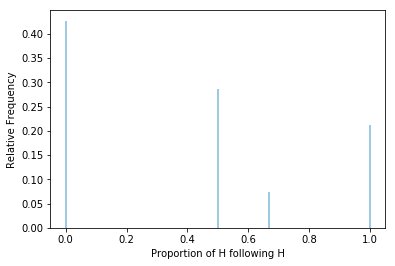

In [10]:
x.plot()
plt.xlabel('Proportion of H following H');

In [11]:
x.mean()

0.40516666666666673